In [6]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [73]:
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('..\\datos_2\\df_final_2.csv', index_col=0)
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV_robust,kilometer_robust,monthOfRegistration,fuelType,brand,notRepairedDamage,lastSeen,year_created,month_created,abtest_control,abtest_test
0,6063.113615,480,5460.941980,4754.657517,4896.491342,0.883544,0.0,2919.463387,5164.253826,5550.381609,3587.013694,7063.134322,6116.130326,6060.595716,0.0,1.0
1,6063.113615,18300,11383.555059,12500.430163,4896.491342,0.873418,-0.5,6257.618269,8643.315620,9118.220511,2575.026622,7063.134322,6116.130326,6060.595716,0.0,1.0
2,6063.113615,9800,13332.987795,4754.657517,10732.002875,0.544304,-0.5,6215.009754,8643.315620,11254.324254,3587.013694,7063.134322,6116.130326,6060.595716,0.0,1.0
3,6063.113615,1500,3009.155313,4754.657517,4896.491342,-0.556962,0.0,6413.320982,5164.253826,5550.381609,7106.150521,4807.256389,6116.130326,6060.595716,0.0,1.0
4,6063.113615,3600,3009.155313,4754.657517,4896.491342,-0.632911,-1.2,6854.434814,8643.315620,6574.152684,7106.150521,7063.134322,6116.130326,6060.595716,0.0,1.0


In [12]:
columnas_eliminar = ['abtest_control', 'abtest_test' ,'month_created', 'year_created', 'lastSeen', 'monthOfRegistration', 'dateCrawled']

In [13]:
df.drop(columns=columnas_eliminar, inplace=True)

In [14]:
x= df.drop(columns='price')
y = df[['price']]

In [15]:
y.describe()

,price
count,343922.000000
mean,6116.605140
std,8244.929837
min,301.000000
25%,1450.000000
50%,3350.000000
75%,7790.000000
max,179999.000000


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [17]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [18]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[ 9107.93871327],
       [ 9706.15141182],
       [14516.25763003]])

In [19]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[11408.179734  ],
       [ 4532.7034542 ],
       [ -985.64579946]])

In [20]:
metricas = {
'train': {
    'r2_score': r2_score(y_train, y_train_pred),
    'MAE': mean_absolute_error(y_train, y_train_pred),
    'MSE': mean_squared_error(y_train, y_train_pred),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
},
'test': {
    'r2_score': r2_score(y_test, y_test_pred),
    'MAE': mean_absolute_error(y_test, y_test_pred),
    'MSE': mean_squared_error(y_test, y_test_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

}
}

pd.DataFrame(metricas).T

,r2_score,MAE,MSE,RMSE
train,0.570299,3250.972388,2.925892e+07,5409.151520
test,0.574151,3233.244094,2.883640e+07,5369.953525


In [21]:
# Convertir a arrays planos si son multidimensionales
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

Text(0, 0.5, 'Predicciones (y_test_pred)')

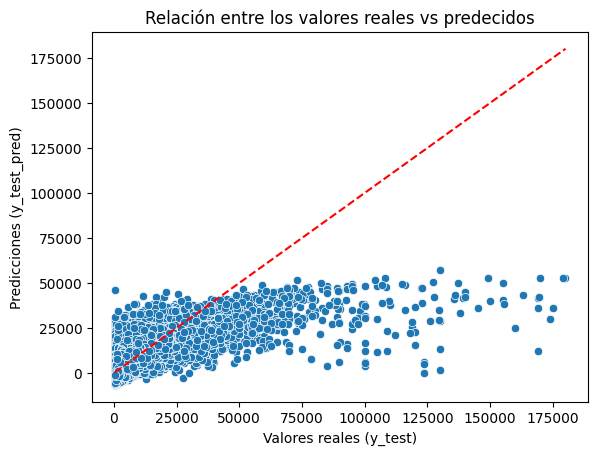

In [22]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

# Cross Validation

In [23]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

## K Fold

In [24]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_r2 = cross_val_score(modelo_lineal,
                           x,
                           y,
                           cv=kf, 
                           scoring="r2")

score_r2 # me quedo con la media de mis r2
np.mean(score_r2)

0.5715963440061362

In [25]:
kf = KFold(n_splits=5, #entre 5 y 10
           shuffle=True, # puede repetir cajas
           random_state=42)

score_mse = cross_val_score(modelo_lineal,
                           x,
                           y,
                           cv=kf, 
                           scoring="neg_mean_squared_error")

score_mse # me quedo con la media de mis r2
abs(np.mean(score_mse))

29134438.250933968

In [26]:
kf = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_rmse = cross_val_score(modelo_lineal, 
                           x, 
                          y, 
                           cv = kf, 
                            scoring="neg_root_mean_squared_error" )
abs(np.mean(score_rmse))

5396.299107522362

## Decision Tree

In [27]:
params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

In [28]:
params_arbol_2 = {
    'max_depth': [6, 8, 9, 10],
    'min_samples_split': [8, 9, 11, 13,],
    'min_samples_leaf': [80, 90, 100, 110],
    'max_leaf_nodes': [25, 30, 35, 40, 45]
}

In [29]:
params_arbol_3 = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [7, 10, 12, 15],
    'min_samples_leaf': [80, 90, 100, 110],
    'max_leaf_nodes': [20,30,40,50]
}

In [30]:
params_arbol_4 = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [9,12,14, 15],
    'min_samples_leaf': [70, 100, 130, 150],
    'max_leaf_nodes': [35,45,50,55]
}

In [31]:
params_arbol_5 = {
    'max_depth': [8,10,12,15],
    'min_samples_split': [9,12,15, 18],
    'min_samples_leaf': [50, 95, 100,150],
    'max_leaf_nodes': [55,70,90,100]
}

In [32]:
params_arbol_7 = {
    'max_depth': [3,7,12,15],
    'min_samples_split': [9,12,15, 18],
    'min_samples_leaf': [50, 95, 100,150],
    'max_leaf_nodes': [35,70,105,140]
}

In [33]:
params_arbol_6 = {
    'max_depth': [9, 9.5,11,17],
    'min_samples_split': [6,9,14,16],
    'min_samples_leaf': [20, 30, 40, 50],
    'max_leaf_nodes': [90,100,110,130]
}

In [66]:
params_arbol_8 = {
    'max_depth': [11,13],
    'min_samples_split': [6,12,18],
    'min_samples_leaf': [5, 10, 25],
    'max_leaf_nodes': [150,200,250]
}

PAMS 7

In [34]:
grid_search_arbol_7 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_7,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_7.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 7, 12, 15],
                         'max_leaf_nodes': [35, 70, 105, 140],
                         'min_samples_leaf': [50, 95, 100, 150],
                         'min_samples_split': [9, 12, 15, 18]},
             scoring='neg_mean_squared_error')

In [35]:
modelo_final_arbol_7 = grid_search_arbol_7.best_estimator_

In [36]:
y_test_pred_final_7 = modelo_final_arbol_7.predict(x_test)
y_train_pred_final_7 = modelo_final_arbol_7.predict(x_train)

In [37]:
df_metricas_arbol_7 = metricas(y_train, y_train_pred_final_7, y_test, y_test_pred_final_7)

In [38]:
df_metricas_arbol_7

,r2_score,MAE,MSE,RMSE
train,0.697393,2410.384399,2.060491e+07,4539.263382
test,0.693099,2418.860642,2.078183e+07,4558.709005


PAMS 4

In [39]:
grid_search_arbol_4 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_4,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_4.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [35, 45, 50, 55],
                         'min_samples_leaf': [70, 100, 130, 150],
                         'min_samples_split': [9, 12, 14, 15]},
             scoring='neg_mean_squared_error')

In [40]:
grid_search_arbol_4.best_estimator_

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=55, min_samples_leaf=70,
                      min_samples_split=9)

In [41]:
modelo_final_arbol_4 = grid_search_arbol_4.best_estimator_

In [42]:
y_test_pred_final_4 = modelo_final_arbol_4.predict(x_test)
y_train_pred_final_4 = modelo_final_arbol_4.predict(x_train)

In [43]:
df_metricas_arbol_4 = metricas(y_train, y_train_pred_final_4, y_test, y_test_pred_final_4)

In [44]:
df_metricas_arbol_4

,r2_score,MAE,MSE,RMSE
train,0.654007,2662.507340,2.355909e+07,4853.77025
test,0.652339,2660.545108,2.354188e+07,4851.99757


PAMS 5

In [45]:
grid_search_arbol_5 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_5.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 15],
                         'max_leaf_nodes': [55, 70, 90, 100],
                         'min_samples_leaf': [50, 95, 100, 150],
                         'min_samples_split': [9, 12, 15, 18]},
             scoring='neg_mean_squared_error')

In [46]:
modelo_final_arbol_5 = grid_search_arbol_5.best_estimator_

In [47]:
y_test_pred_final_5 = modelo_final_arbol_5.predict(x_test)
y_train_pred_final_5 = modelo_final_arbol_5.predict(x_train)

In [48]:
df_metricas_arbol_5 = metricas(y_train, y_train_pred_final_5, y_test, y_test_pred_final_5)

In [49]:
df_metricas_arbol_5

,r2_score,MAE,MSE,RMSE
train,0.683903,2480.945665,2.152343e+07,4639.334679
test,0.681013,2487.794543,2.160024e+07,4647.606327


# PAMS 6

In [50]:
grid_search_arbol_6 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_6,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_6.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [9, 9.5, 11, 17],
                         'max_leaf_nodes': [90, 100, 110, 130],
                         'min_samples_leaf': [20, 30, 40, 50],
                         'min_samples_split': [6, 9, 14, 16]},
             scoring='neg_mean_squared_error')

In [51]:
grid_search_arbol_6.best_estimator_

DecisionTreeRegressor(max_depth=11, max_leaf_nodes=130, min_samples_leaf=20,
                      min_samples_split=6)

In [52]:
modelo_final_arbol_6 = grid_search_arbol_6.best_estimator_

In [53]:
y_test_pred_final_6 = modelo_final_arbol_6.predict(x_test)
y_train_pred_final_6 = modelo_final_arbol_6.predict(x_train)

In [54]:
df_metricas_arbol_6 = metricas(y_train, y_train_pred_final_6, y_test, y_test_pred_final_6)

In [55]:
df_metricas_arbol_6

,r2_score,MAE,MSE,RMSE
train,0.701978,2428.025817,2.029270e+07,4504.741561
test,0.697149,2434.033707,2.050761e+07,4528.532939


Utilizando mis métricas para los parámetros 5, los valores anteriores son los mejores hasta ahora.

In [67]:
grid_search_arbol_8 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_8,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_8.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [11, 13],
                         'max_leaf_nodes': [150, 200, 250],
                         'min_samples_leaf': [5, 10, 25],
                         'min_samples_split': [6, 12, 18]},
             scoring='neg_mean_squared_error')

In [68]:
grid_search_arbol_8.best_estimator_

DecisionTreeRegressor(max_depth=11, max_leaf_nodes=250, min_samples_leaf=10,
                      min_samples_split=6)

In [69]:
modelo_final_arbol_8 = grid_search_arbol_8.best_estimator_

In [70]:
y_test_pred_final_8 = modelo_final_arbol_8.predict(x_test)
y_train_pred_final_8 = modelo_final_arbol_8.predict(x_train)

In [71]:
df_metricas_arbol_8 = metricas(y_train, y_train_pred_final_8, y_test, y_test_pred_final_8)

In [72]:
df_metricas_arbol_8

,r2_score,MAE,MSE,RMSE
train,0.734793,2298.408231,1.805829e+07,4249.504198
test,0.721187,2318.478402,1.887986e+07,4345.096620


## Opciones de visualización para mejorar

In [56]:
# plot_tree(decision_tree=modelo_final_arbol_4,
#             feature_names=x.columns,
#             filled=True
#                         )

In [58]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol_6.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
243,1.077431,0.021364,0.017999,0.001435,17.0,130,20,16,"{'max_depth': 17, 'max_leaf_nodes': 130, 'min_...",-1.966654e+07,-2.143261e+07,-2.291030e+07,-2.100219e+07,-2.222019e+07,-2.144637e+07,1.105184e+06,1
176,1.218875,0.277826,0.018146,0.000973,11.0,130,20,6,"{'max_depth': 11, 'max_leaf_nodes': 130, 'min_...",-1.966654e+07,-2.143261e+07,-2.291030e+07,-2.100219e+07,-2.222019e+07,-2.144637e+07,1.105184e+06,1
179,1.318657,0.263808,0.017326,0.000813,11.0,130,20,16,"{'max_depth': 11, 'max_leaf_nodes': 130, 'min_...",-1.966654e+07,-2.143261e+07,-2.291030e+07,-2.100219e+07,-2.222019e+07,-2.144637e+07,1.105184e+06,1
240,1.081590,0.048404,0.019772,0.002326,17.0,130,20,6,"{'max_depth': 17, 'max_leaf_nodes': 130, 'min_...",-1.966654e+07,-2.143261e+07,-2.291030e+07,-2.100219e+07,-2.222019e+07,-2.144637e+07,1.105184e+06,1
241,1.113327,0.033071,0.020883,0.002795,17.0,130,20,9,"{'max_depth': 17, 'max_leaf_nodes': 130, 'min_...",-1.966654e+07,-2.143261e+07,-2.291030e+07,-2.100219e+07,-2.222019e+07,-2.144637e+07,1.105184e+06,1
242,1.124071,0.065031,0.020466,0.002500,17.0,130,20,14,"{'max_depth': 17, 'max_leaf_nodes': 130, 'min_...",-1.966654e+07,-2.143261e+07,-2.291030e+07,-2.100219e+07,-2.222019e+07,-2.144637e+07,1.105184e+06,1
177,1.178545,0.219789,0.016773,0.001359,11.0,130,20,9,"{'max_depth': 11, 'max_leaf_nodes': 130, 'min_...",-1.966654e+07,-2.143261e+07,-2.291030e+07,-2.100219e+07,-2.222019e+07,-2.144637e+07,1.105184e+06,1
178,1.144240,0.198776,0.021080,0.008623,11.0,130,20,14,"{'max_depth': 11, 'max_leaf_nodes': 130, 'min_...",-1.966654e+07,-2.143261e+07,-2.291030e+07,-2.100219e+07,-2.222019e+07,-2.144637e+07,1.105184e+06,1
48,1.142075,0.100866,0.019566,0.004984,9.0,130,20,6,"{'max_depth': 9, 'max_leaf_nodes': 130, 'min_s...",-1.970042e+07,-2.147452e+07,-2.297097e+07,-2.100219e+07,-2.243507e+07,-2.151664e+07,1.142248e+06,9
49,1.154678,0.138278,0.017360,0.000731,9.0,130,20,9,"{'max_depth': 9, 'max_leaf_nodes': 130, 'min_s...",-1.970042e+07,-2.147452e+07,-2.297097e+07,-2.100219e+07,-2.243507e+07,-2.151664e+07,1.142248e+06,9


In [59]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
243,17.0,130,20,16,-2.144637e+07
176,11.0,130,20,6,-2.144637e+07
179,11.0,130,20,16,-2.144637e+07
240,17.0,130,20,6,-2.144637e+07
241,17.0,130,20,9,-2.144637e+07
...,...,...,...,...,...
117,9.5,130,30,9,NaN
116,9.5,130,30,6,NaN
115,9.5,130,20,16,NaN
91,9.5,100,40,16,NaN


In [60]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [61]:
df_rmse_prof

,param_max_depth,MSE
0,9.0,4704.942687
1,9.5,NaN
2,11.0,4701.590936
3,17.0,4701.590936


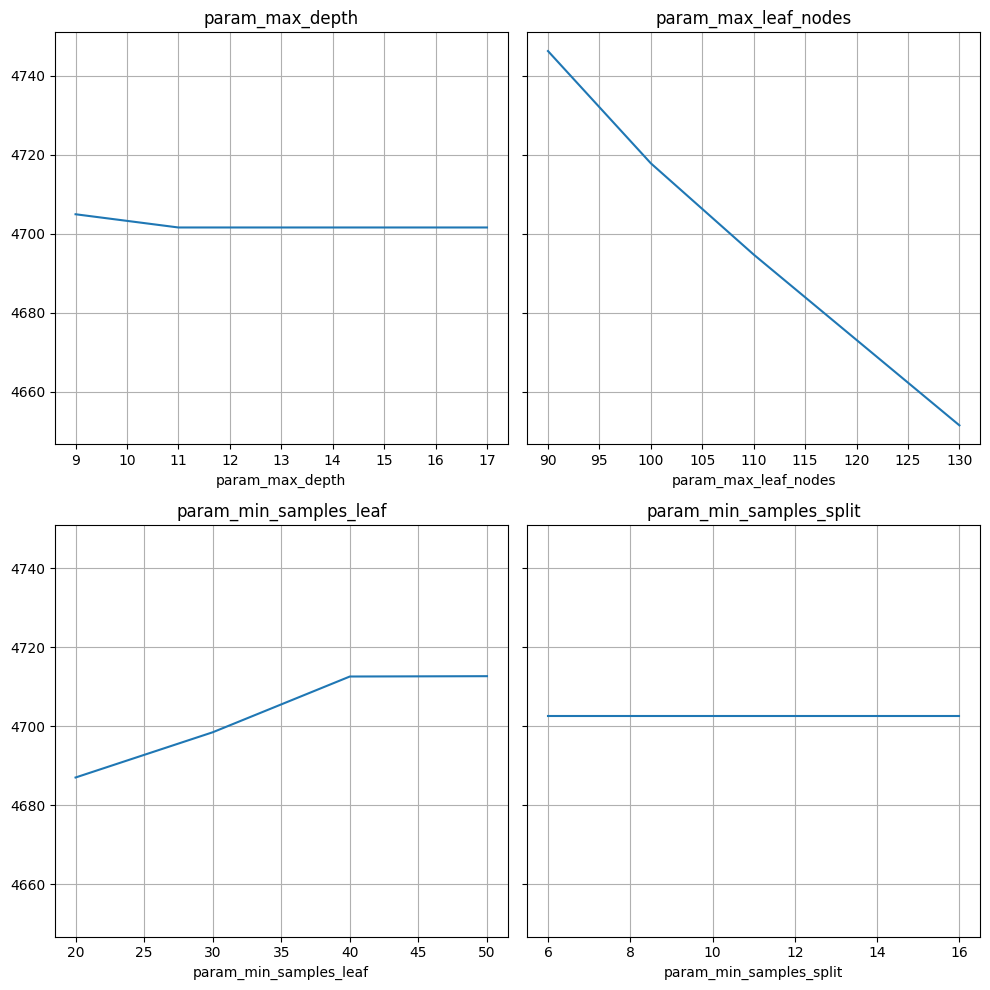

In [62]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 



In [63]:
df_importancia = pd.DataFrame(modelo_final_arbol_6.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

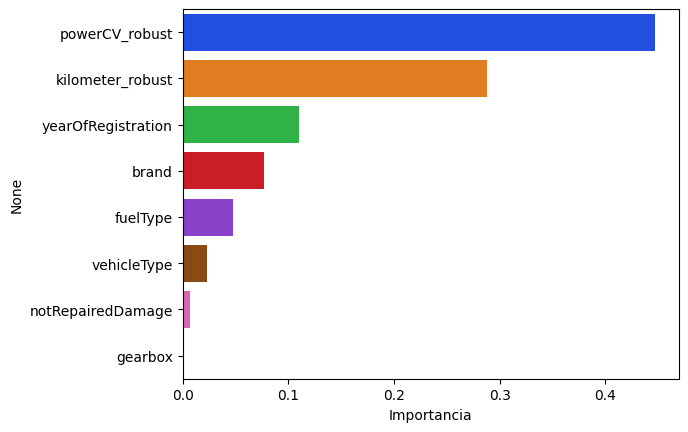

In [64]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

In [65]:
prueba

NameError: name 'prueba' is not defined

# Ensamble

## Random Forest

In [74]:
params_rdf = {
    'n_estimators': [120, 150, 200,250],
    'max_features': [2,4,6],
    'max_depth': [9],
    'min_samples_split': [6],
    'min_samples_leaf': [20,40], 
    # 'max_leaf_nodes': [55]
}

modelo_rdf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rdf = RandomizedSearchCV(modelo_rdf, # solo hace las iteraciones que le digo
                              params_rdf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=25,
                              verbose=10)

randonmized_rdf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rdf = randonmized_rdf.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [75]:
modelo_final_rdf

RandomForestRegressor(max_depth=9, max_features=4, min_samples_leaf=20,
                      min_samples_split=6, n_estimators=200, n_jobs=-1,
                      random_state=42)

In [76]:
y_pred_test_rdf = modelo_final_rdf.predict(x_test)
y_pred_train_rdf = modelo_final_rdf.predict(x_train)
df_metricas_rdf = metricas(y_train, y_pred_train_rdf, y_test, y_pred_test_rdf)
df_metricas_rdf

,r2_score,MAE,MSE,RMSE
train,0.744625,2184.375445,1.738883e+07,4169.991910
test,0.740762,2196.622093,1.755431e+07,4189.785918


In [ ]:
params_rf = {
    'n_estimators': [120, 150, 180 ,210],
    'max_features': [2,4,6],
    'max_depth': [9,11],
    'min_samples_split': [5,6,7],
    'min_samples_leaf': [10,20,40], 
    'max_leaf_nodes': [150,200,250,300]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_rf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [ ]:
modelo_final_rf


RandomForestRegressor(max_depth=10, max_features=4, max_leaf_nodes=55,
                      min_samples_leaf=100, min_samples_split=9,
                      n_estimators=150, random_state=42)

In [ ]:
grid_search_rf.best_params_


{'max_depth': 10,
 'max_features': 4,
 'max_leaf_nodes': 55,
 'min_samples_leaf': 100,
 'min_samples_split': 9,
 'n_estimators': 150}

In [ ]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.687028,2405.588399,2.158108e+07,4645.543636
test,0.687248,2404.961805,2.137517e+07,4623.329079


## Gradient Booster

In [78]:
# Definimos un espacio de parámetros para optimizar
params_gb = {
    'n_estimators': [200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [9],
    'min_samples_split': [6],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [79]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.843620,1745.738403,1.064814e+07,3263.149446
test,0.798511,1840.091231,1.364383e+07,3693.755836


# XGB

In [80]:
from xgboost import XGBRegressor

In [82]:
# Definimos un espacio de parámetros para optimizar
params_xgb = {
    'n_estimators': [200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [9,10],
    'min_child_weight': [7,8,9],
    'subsample': [0.6, 0.8, 1], 
    'colsample_bytree': [0.25,0.30,0.35,0.40]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [83]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.812792,1836.233432,1.274726e+07,3570.330172
test,0.780517,1900.340598,1.486229e+07,3855.164700
